In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shreypatel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/shreypatel/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shreypatel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/shreypatel/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Train Data distribution

In [38]:
def convert_to_sentiment(label):
    if (int(label) <= 2):
        return 'Negative'
    elif (int(label) == 3):
        return 'Neutral'
    else:
        return 'Positive'

In [39]:
train_df = pd.read_csv("./data/train.csv", sep=',')
train_df.columns = ['label', 'text']
train_df['label'] = train_df['label'].apply(convert_to_sentiment)
sentiment_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
train_df['label'] = train_df['label'].map(sentiment_mapping)
train_df

,label,text
0,2,dr. goldberg offers everything i look for in a...
1,0,"Unfortunately, the frustration of being Dr. Go..."
2,2,Been going to Dr. Goldberg for over 10 years. ...
3,2,Got a letter in the mail last week that said D...
4,0,I don't know what Dr. Goldberg was like before...
...,...,...
649995,2,I had a sprinkler that was gushing... pipe bro...
649996,0,Phone calls always go to voicemail and message...
649997,0,Looks like all of the good reviews have gone t...
649998,2,I was able to once again rely on Yelp to provi...


In [40]:
train_df.head()

,label,text
0,2,dr. goldberg offers everything i look for in a...
1,0,"Unfortunately, the frustration of being Dr. Go..."
2,2,Been going to Dr. Goldberg for over 10 years. ...
3,2,Got a letter in the mail last week that said D...
4,0,I don't know what Dr. Goldberg was like before...


In [41]:
train_df['label'].value_counts()

label
2    260000
0    260000
1    130000
Name: count, dtype: int64

In [42]:
import re
def normalize_text(text):
    # convert to lower case
    text = text.lower()

    # replace contractions with full words
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)

    # remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    tokens = word_tokenize(text)
    stops = set(stopwords.words('english'))

    filtered_tokens = [
        token for token in tokens
        if token not in stops and token.isalpha()
    ]

    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # 8. Join tokens back into a single string
    return ' '.join(lemmatized_tokens)

In [43]:
train_df['text'] = train_df['text'].apply(normalize_text)

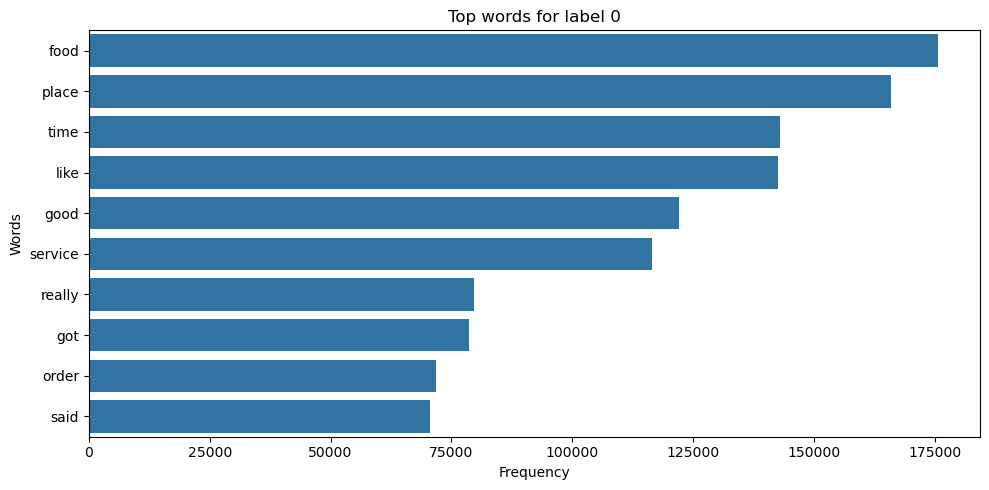

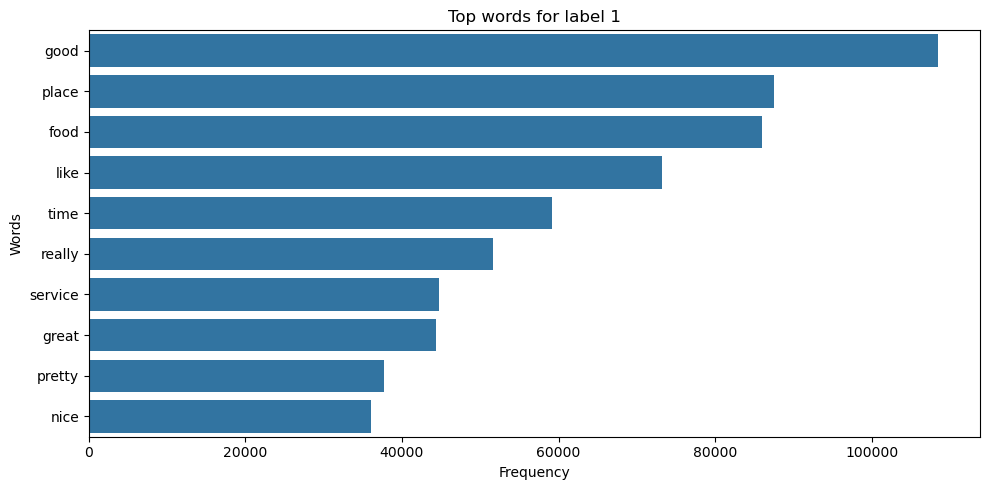

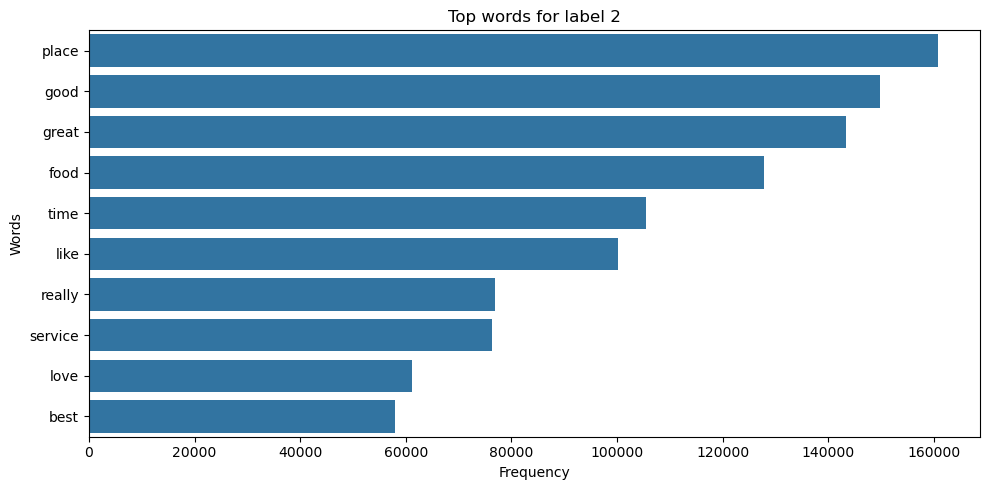

In [44]:
# Separate plots for each label
labels = train_df['label'].unique()

for label in sorted(labels):
    # Filter text by label
    text_data = train_df[train_df['label'] == label]['text']
    
    # Vectorize
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(text_data)
    sum_words = X.sum(axis=0)
    
    # Get word frequencies
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:10]
    words, freqs = zip(*words_freq)
    
    # Create separate plot
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(freqs), y=list(words))
    plt.title(f"Top words for label {label}")
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.tight_layout()
    plt.show()

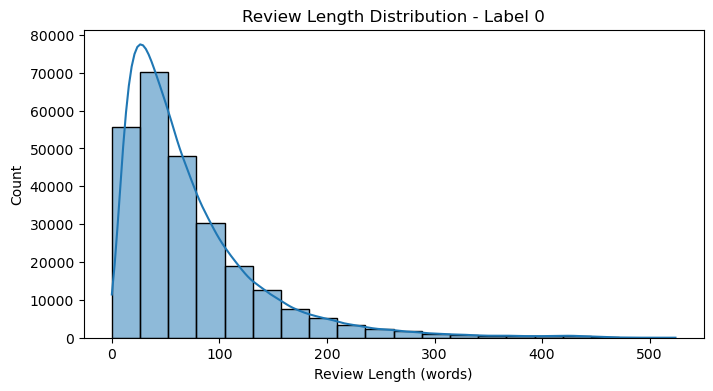

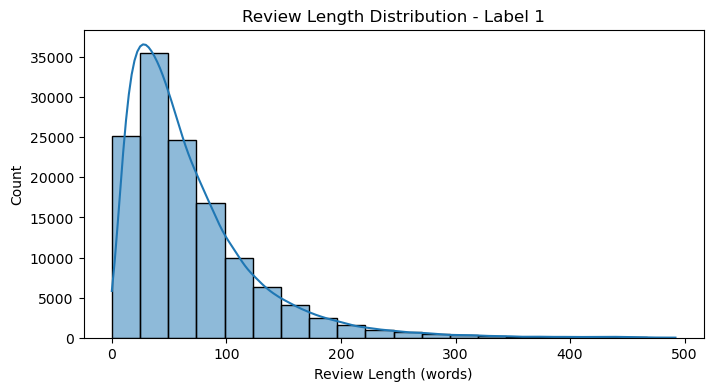

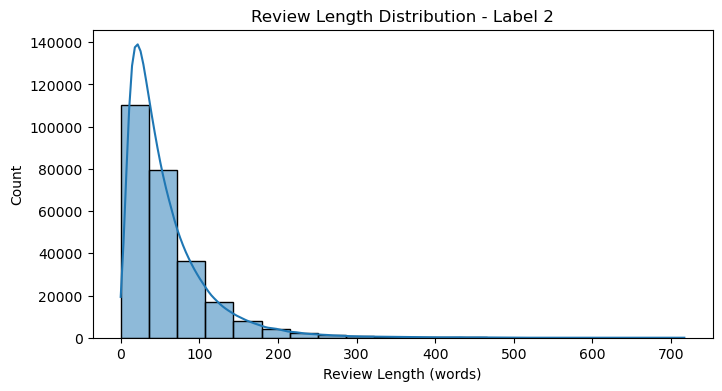

In [45]:
labels = sorted(train_df['label'].unique())
# Step 1: Add a 'length' column to the DataFrame
train_df['review_length'] = train_df['text'].apply(lambda x: len(x.split()))  # or use len(x) for characters

for label in labels:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_df[train_df['label'] == label]['review_length'], bins=20, kde=True)
    plt.title(f"Review Length Distribution - Label {label}")
    plt.xlabel("Review Length (words)")
    plt.ylabel("Count")
    plt.show()


### Test Data distribution

In [31]:
test_df = pd.read_csv("./data/test.csv", sep=',')
test_df.columns = ['label', 'text']
test_df['label'] = test_df['label'].apply(convert_to_sentiment)
sentiment_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
test_df['label'] = test_df['label'].map(sentiment_mapping)
test_df

,label,text
0,0,I got 'new' tires from them and within two wee...
1,0,Don't waste your time. We had two different p...
2,0,All I can say is the worst! We were the only 2...
3,0,I have been to this restaurant twice and was d...
4,0,Food was NOT GOOD at all! My husband & I ate h...
...,...,...
49995,0,Just wanted to write a review to chip in with ...
49996,2,Great ambience. Great drinks. Great food. I lo...
49997,2,I have been to the other Monks locations so I ...
49998,0,Don't go here. I know you might want to try i...


In [32]:
test_df.head()

,label,text
0,0,I got 'new' tires from them and within two wee...
1,0,Don't waste your time. We had two different p...
2,0,All I can say is the worst! We were the only 2...
3,0,I have been to this restaurant twice and was d...
4,0,Food was NOT GOOD at all! My husband & I ate h...


In [33]:
test_df['label'].value_counts()

label
0    20000
2    20000
1    10000
Name: count, dtype: int64

In [34]:
test_df['text'] = test_df['text'].apply(normalize_text)

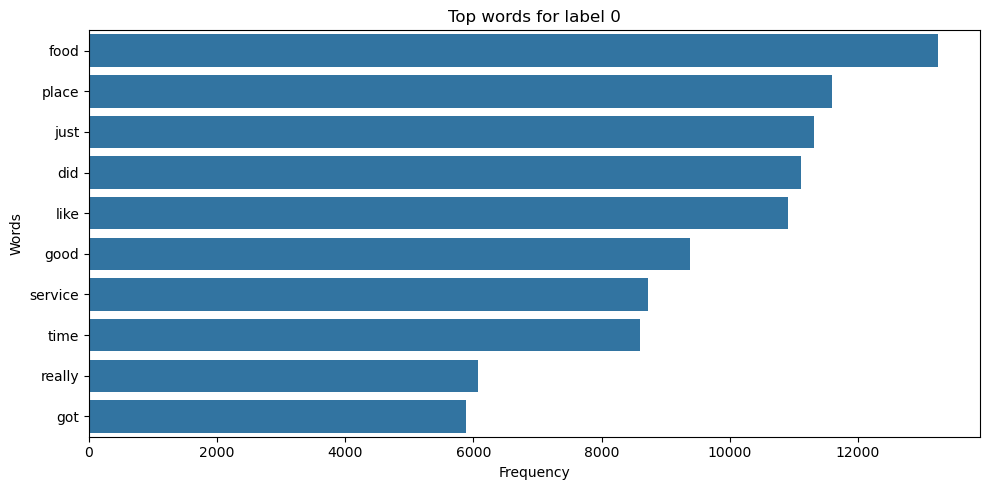

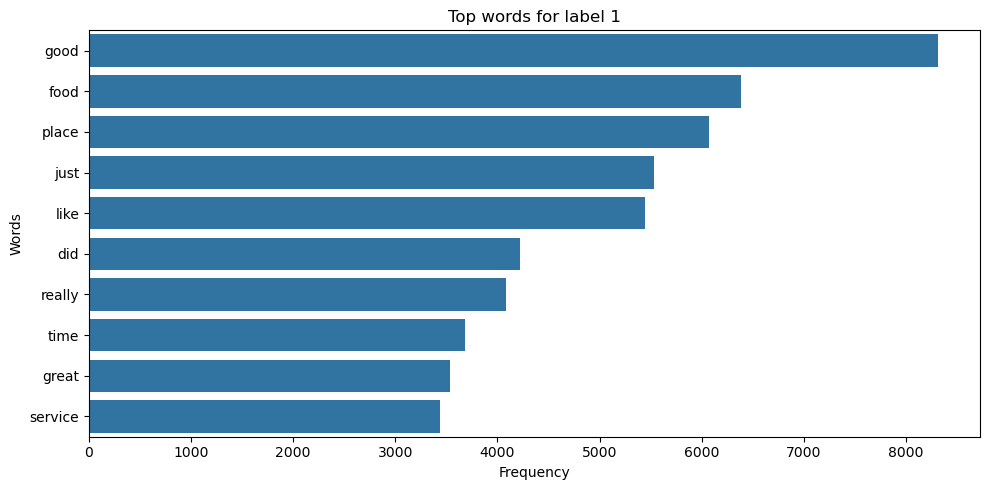

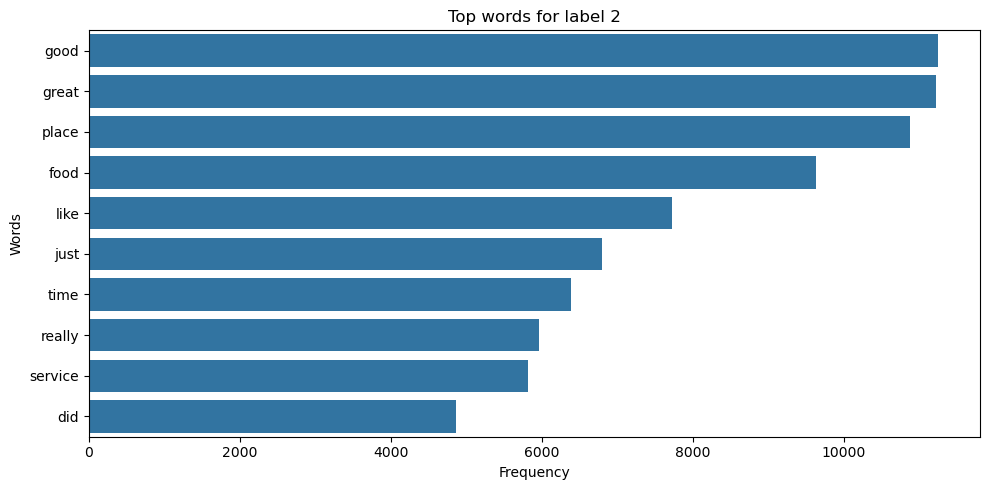

In [35]:
# Separate plots for each label
labels = test_df['label'].unique()

for label in sorted(labels):
    # Filter text by label
    text_data = test_df[test_df['label'] == label]['text']
    
    # Vectorize
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(text_data)
    sum_words = X.sum(axis=0)
    
    # Get word frequencies
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:10]
    words, freqs = zip(*words_freq)
    
    # Create separate plot
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(freqs), y=list(words))
    plt.title(f"Top words for label {label}")
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.tight_layout()
    plt.show()

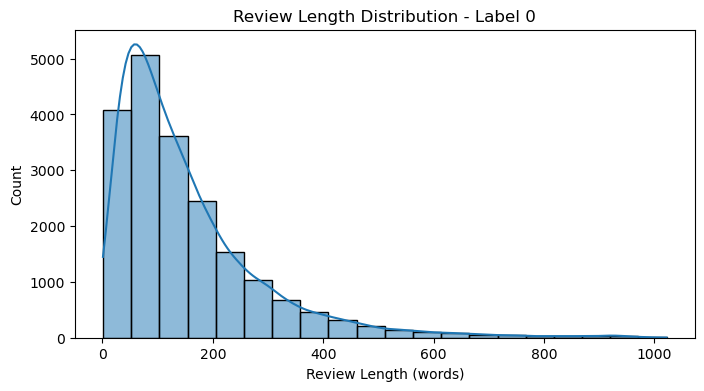

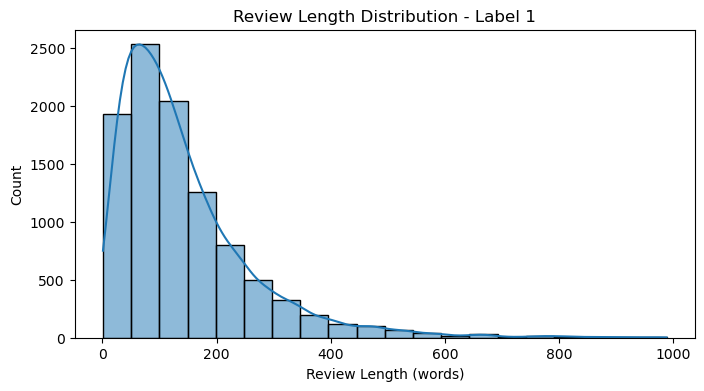

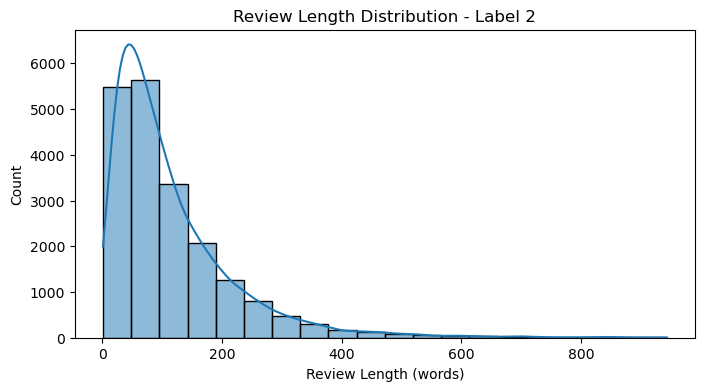

In [36]:
labels = sorted(test_df['label'].unique())
test_df['review_length'] = test_df['text'].apply(lambda x: len(x.split()))

for label in labels:
    plt.figure(figsize=(8, 4))
    sns.histplot(test_df[test_df['label'] == label]['review_length'], bins=20, kde=True)
    plt.title(f"Review Length Distribution - Label {label}")
    plt.xlabel("Review Length (words)")
    plt.ylabel("Count")
    plt.show()


In [2]:
import pandas as pd
import os

data_dir = "/Users/shreypatel/Documents/Humber/AIGC_5500/Final Project/data/test.csv"
df = pd.read_csv(data_dir)

In [3]:
df.head()

,class_index,review_text
0,1,I got 'new' tires from them and within two wee...
1,1,Don't waste your time. We had two different p...
2,1,All I can say is the worst! We were the only 2...
3,1,I have been to this restaurant twice and was d...
4,1,Food was NOT GOOD at all! My husband & I ate h...


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shreypatel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/shreypatel/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


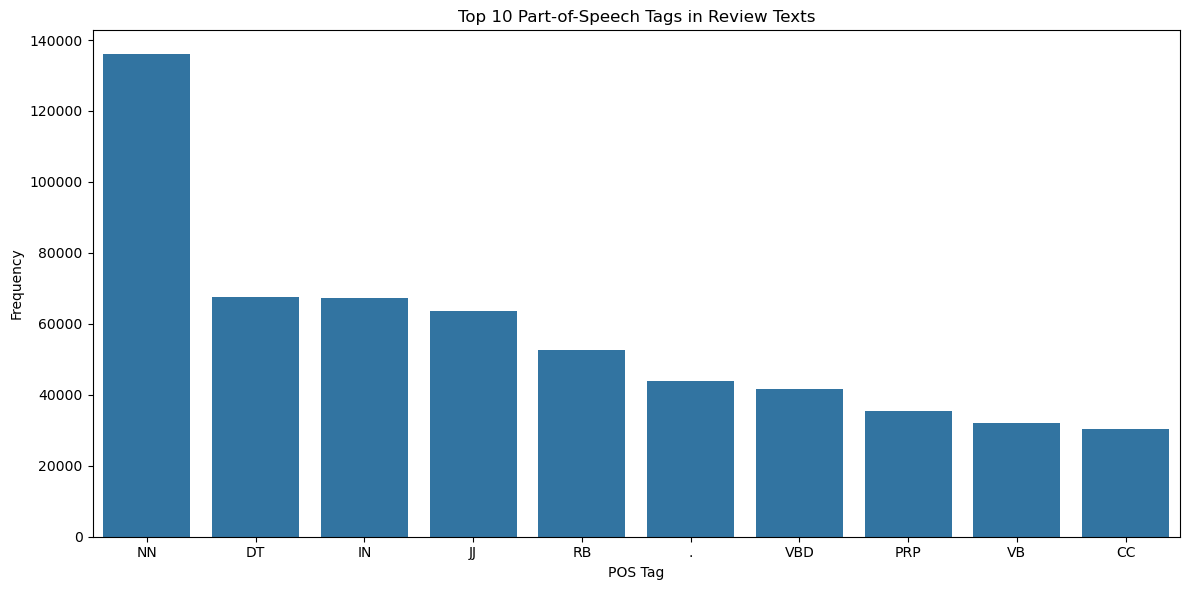

,POS,Count
6,NN,135930
5,DT,67589
3,IN,67332
2,JJ,63748
15,RB,52507
19,.,44007
1,VBD,41649
0,PRP,35437
11,VB,32013
8,CC,30421


In [4]:
import nltk
from collections import Counter
from nltk import pos_tag, word_tokenize
from nltk.corpus import stopwords

# Download required NLTK data
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Sample a subset to speed up processing
sample_reviews = df['review_text'].sample(5000, random_state=30)

# Tokenize and POS tag
pos_counts = Counter()
for review in sample_reviews:
    tokens = word_tokenize(review.lower())
    tags = pos_tag(tokens)
    pos_tags_only = [tag for word, tag in tags]
    pos_counts.update(pos_tags_only)

# Create DataFrame for visualization
pos_df = pd.DataFrame(pos_counts.items(), columns=['POS', 'Count']).sort_values(by='Count', ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns

# Plot top 10 POS tags
plt.figure(figsize=(12,6))
sns.barplot(data=pos_df.head(10), x='POS', y='Count')
plt.title("Top 10 Part-of-Speech Tags in Review Texts")
plt.xlabel("POS Tag")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

pos_df.head(10)
